# Gender Recognition by Voice

# The Dataset

Download CSV file from : https://www.kaggle.com/primaryobjects/voicegender 

The following acoustic properties of each voice are measured and included within the CSV:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

#### Important Libraries:
- Pandas:
- Matplotlib
- Numpy
- Scikit-Learn

In [1]:
# importing modules

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# opening csv file using pandas creating Dataframe
Music = pd.read_csv('E:\Akshay\python\Voicegender\Voice.csv')

# printing head of Dataframe
print(Music.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812

In [3]:
# Finding Correalation of Features
Music.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [4]:
# printing shape of Dataframe
print('Shape of Music DataFrame',Music.shape)

Shape of Music DataFrame (3168, 21)


In [5]:
# printing keys or features of Music
print('Features: \n', Music.keys())

Features: 
 Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [6]:
# Counting Number of Male and Number of Female in Data

print('Number of Males:',Music[Music['label']=='male'].shape[0])
print('Number of Femles:',Music[Music['label']=='female'].shape[0])

Number of Males: 1584
Number of Femles: 1584


In [7]:
# Function to Plotting 10 features out of 20 of Music 

def Plotting_Features(Fun,f):
    
    i=0 # initial index of features  
    j=0 # initial index of color  
    
    color = ['r','g','b','y','c','darkblue','lightgreen',
             'purple','k','orange','olive'] # colors for plots
    
    # Number of rows
    nrows =5
    
    # Creating Figure and Axis to plot 
    fig, axes = plt.subplots(nrows,2)
    
    # Setting Figure size
    fig.set_figheight(20)
    fig.set_figwidth(20)
    
    for row in axes:
        
        plot1 = Fun[f[i]]
        plot2 = Fun[f[i+3]]
        
        col = [color[j],color[j+1]]
        label = [f[i],f[i+1]]
        
        plot(row, plot1,plot2,col,label)
        
        i=i+4
        
        j=j+2
        
    plt.show()

def plot(axrow, plot1, plot2, col, label):
    
    axrow[0].plot(plot1,label=label[0],color=col[0])
    axrow[0].legend()
    
    axrow[1].plot(plot2,label=label[1],color=col[1])
    axrow[1].legend()

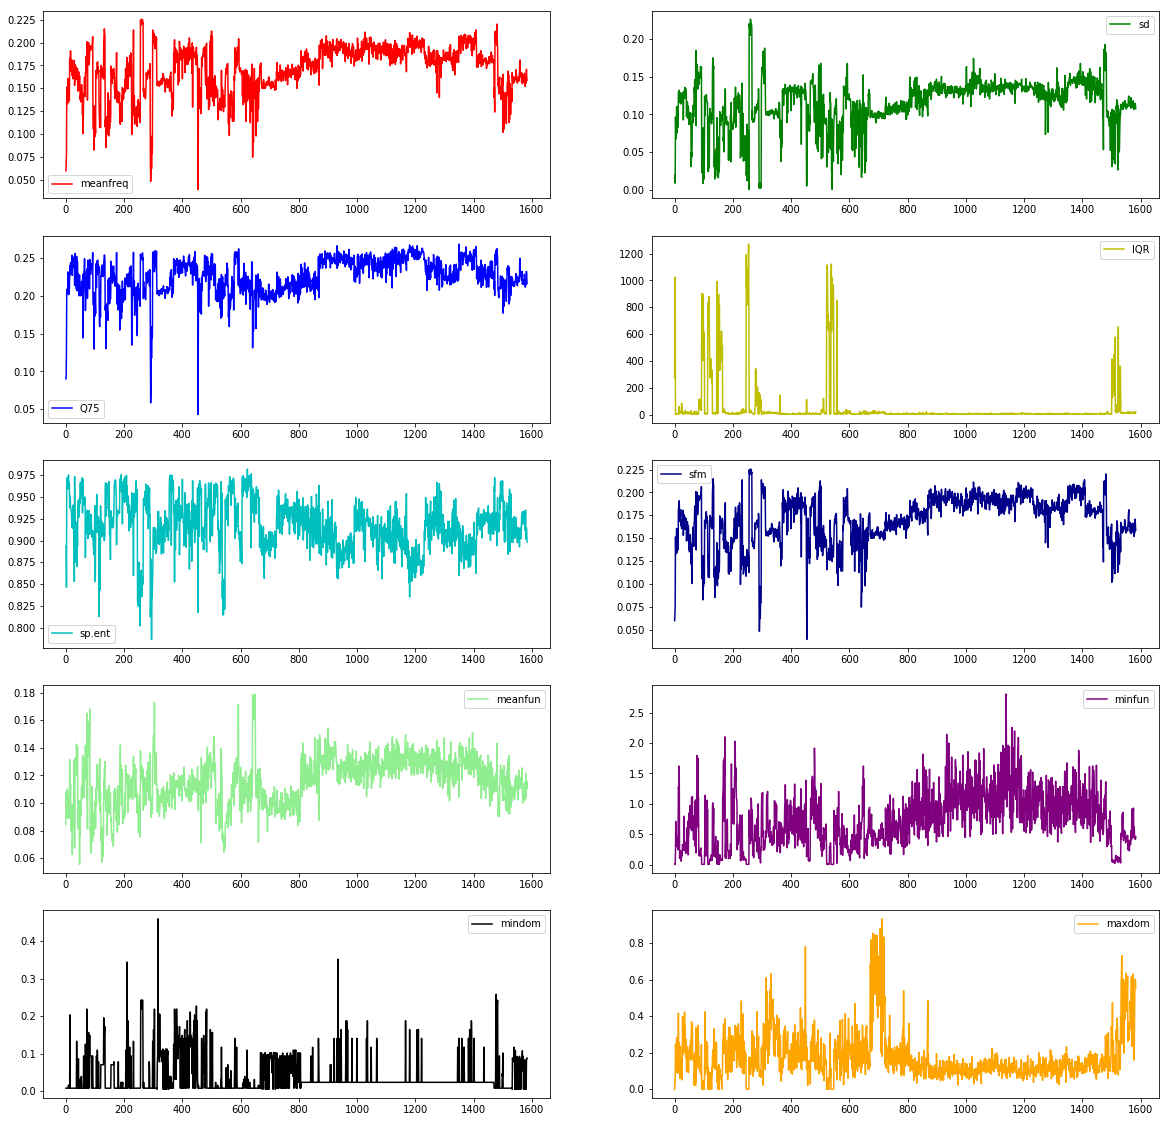

In [8]:
# Setting Male Acoustic Parameters
Male = Music[Music['label']=='male']
Male = Male.drop(['label'],axis=1)
features = Male.keys()
Plotting_Features(Male,features)

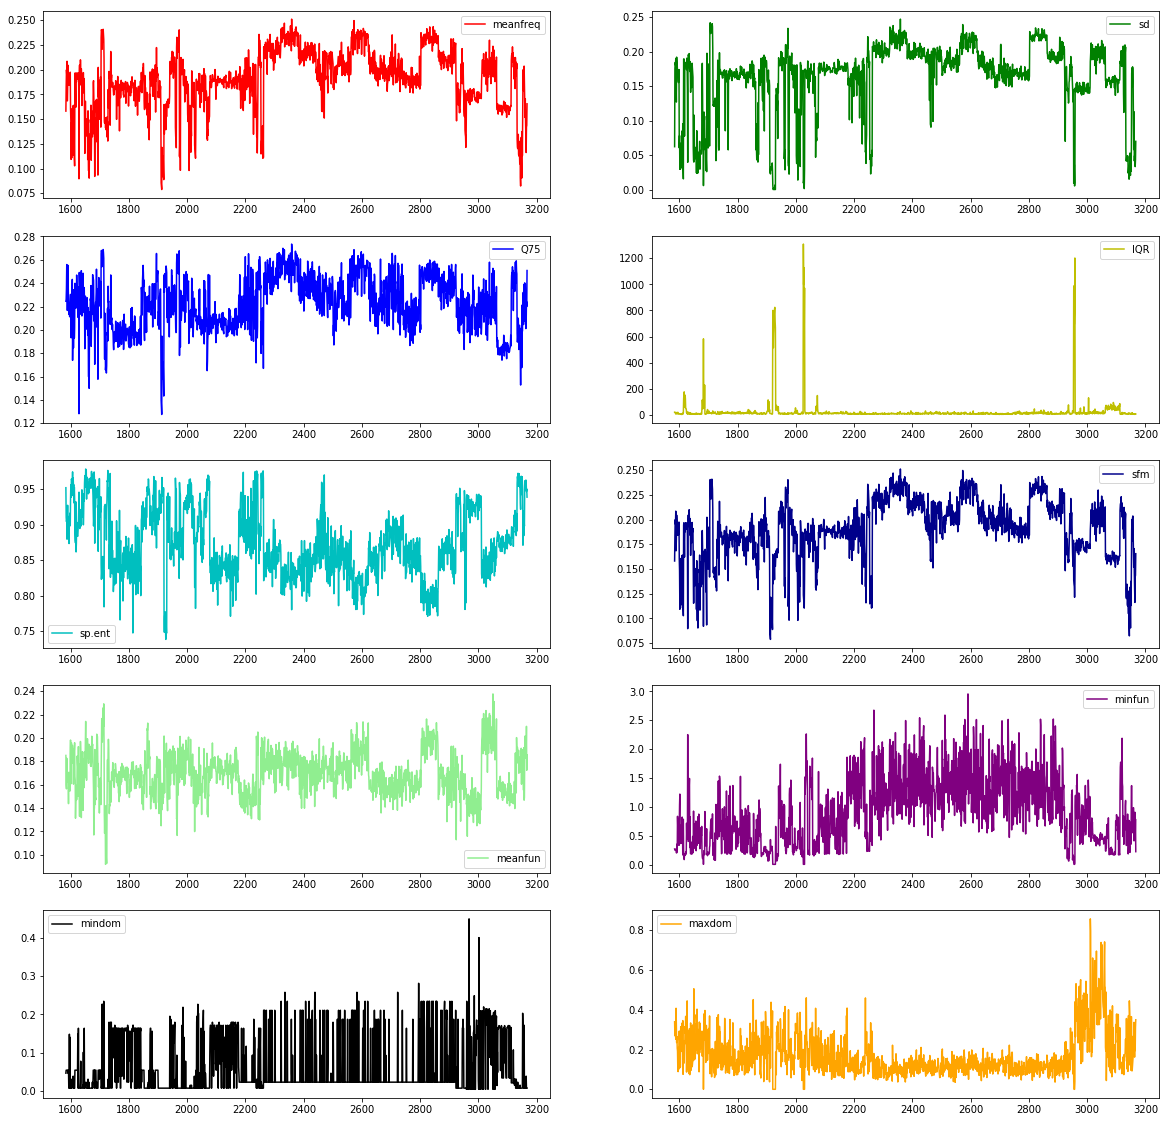

In [9]:
# Setting female Acoustic Parameters
Female = Music[Music['label']=='female']
Female = Female.drop(['label'],axis=1)
features = Female.keys()
Plotting_Features(Female,features)

In [10]:
# creating Train and Target data from data

# dropping label we get our Train data 
X = Music.drop(['label'],axis=1)

# taking only label as target 
Y = Music['label'] 

In [11]:
# Preprocessing Data before prediction

# Using LabelEncoder to Encode our label {'male':1, 'female':0} 
from sklearn.preprocessing import LabelEncoder

Label_Encoder = LabelEncoder()

# Fitting Y data in Label_Encoder for Encoding 
Label_Encoder.fit(Y)

# Transforming Data to {'male':1, 'female':0}
Y_Encoded = Label_Encoder.transform(Y)
Y_Encoded

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
# Using StandardScaler to scale Train Data 
from sklearn.preprocessing import StandardScaler

Standard_Scaler = StandardScaler()

# fitting X data in Standard_Scaler
Standard_Scaler.fit(X)

# Transforming to scale data
X_Scaled = Standard_Scaler.transform(X)

# priting scaled data
X_Scaled

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ..., 
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [13]:
# splitting Data into training and testing Data using cross_validation.train_test_split
# Train - Test data ratio of 75%-25%
# Random State to Randomize data = 123


from sklearn.cross_validation import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_Scaled,Y_Encoded,test_size = 0.25, random_state=123)

c:\users\suraj\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# importing Support Vector Machine Algorithm for Prediction
from sklearn import svm

# creating Classifier
clf = svm.SVC(C =200, gamma = 0.1)

In [15]:
# Training our Classifier 
clf.fit(X_train,Y_train)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# predicting our test data
Prediction = clf.predict(X_test)
Prediction

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0,

In [17]:
# Calculating Accuracy of prediction of Our model 

from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(Prediction,Y_test)
Accuracy

0.98232323232323238

### Cross-Validation on different Kernel  

In [47]:
# importing cross_val_score to calculate score
from sklearn.cross_validation import cross_val_score

In [51]:
# Defining three different kernels
kernels = ['linear','rbf','poly']

score = []

for i in kernels:
    clf = svm.SVC(kernel = i)
    Accuracy = cross_val_score(clf,X_Scaled,Y_Encoded,cv = 15, scoring='accuracy')
    score.append(Accuracy.mean())
for i in range(len(kernels)):
    print(kernels[i],':',score[i])

linear : 0.968466606768
rbf : 0.964974543276
poly : 0.946361185984


### Cross-Validation on different C

In [62]:
score = []
for i in range(10):
    clf = svm.SVC(C = i+1)
    Accuracy = cross_val_score(clf,X_Scaled,Y_Encoded,cv = 15, scoring='accuracy')
    score.append(Accuracy.mean())
for i in range(10):
    print('C =',i+1,': Score =',score[i])

C = 1 : Score = 0.964974543276
C = 2 : Score = 0.964336627733
C = 3 : Score = 0.964345612459
C = 4 : Score = 0.964351602276
C = 5 : Score = 0.96371967655
C = 6 : Score = 0.963402216232
C = 7 : Score = 0.962770290506
C = 8 : Score = 0.961820904462
C = 9 : Score = 0.962135369871
C = 10 : Score = 0.960236597784


### Cross-Validation on different gamma

In [63]:
score = [] 
gamma_values = [0.0001,0.001,0.01,0.1,1.0,100.0,1000.0]
for i in gamma_values:
    clf = svm.SVC(gamma = i)
    Accuracy = cross_val_score(clf,X_Scaled,Y_Encoded,cv = 15, scoring='accuracy')
    score.append(Accuracy.mean())
for i in range(len(gamma_values)):
    print('gamma:',gamma_values[i],': Score:',score[i])

gamma: 0.0001 : Score: 0.888077268643
gamma: 0.001 : Score: 0.959649595687
gamma: 0.01 : Score: 0.96877508236
gamma: 0.1 : Score: 0.962752321054
gamma: 1.0 : Score: 0.91095837077
gamma: 100.0 : Score: 0.500628930818
gamma: 1000.0 : Score: 0.514465408805
